In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
df = pd.read_csv('4xmm_dr14_mos1.csv', index_col=0)
df.head()

,iauname,ra,dec,sum_flag,var_flag,mjd_start,mjd_stop,m1_1_flux,m1_2_flux,m1_3_flux,m1_4_flux,m1_5_flux,m1_8_flux,m1_9_flux,m1_hr1,m1_hr2,m1_hr3,m1_hr4
detid,,,,,,,,,,,,,,,,,,
106935404010036,4XMM J000108.5+231816,0.285446,23.304586,0,f,56304.222130,56304.407789,4.379621e-15,3.810903e-15,1.044120e-14,7.383129e-15,9.202714e-14,1.180420e-13,2.481670e-14,-0.063934,0.514756,-0.586798,0.421289
100161401010013,4XMM J000132.9+625039,0.387447,62.844332,0,f,52143.731053,52144.103715,0.000000e+00,3.210363e-15,1.025320e-14,1.152150e-14,7.585813e-14,1.008432e-13,2.546296e-14,1.000000,0.572813,-0.412404,0.134174
105504607010008,4XMM J183952.6-572328,279.969296,-57.391340,0,f,54939.835231,54940.148137,1.499195e-14,2.694545e-14,2.421777e-14,3.382987e-14,1.477362e-13,2.477213e-13,8.968079e-14,0.290102,0.011869,-0.320638,-0.075001
106049401010003,4XMM J000504.9+725319,1.269593,72.888383,0,f,54897.633889,54899.015567,5.117464e-15,1.737885e-14,4.448721e-14,8.498439e-14,2.119010e-13,3.638689e-13,1.337889e-13,0.583384,0.493798,-0.171473,-0.336829
108317906010155,4XMM J000538.5+200149,1.409738,20.030714,0,f,58491.533206,58492.859838,1.149026e-16,1.392199e-15,6.839098e-16,1.123628e-15,1.947837e-14,2.279300e-14,3.603004e-15,0.849068,-0.282295,-0.246085,0.547067


In [3]:
df.columns

Index(['iauname', 'ra', 'dec', 'sum_flag', 'var_flag', 'mjd_start', 'mjd_stop',
       'm1_1_flux', 'm1_2_flux', 'm1_3_flux', 'm1_4_flux', 'm1_5_flux',
       'm1_8_flux', 'm1_9_flux', 'm1_hr1', 'm1_hr2', 'm1_hr3', 'm1_hr4'],
      dtype='object')

In [4]:
df.describe()

,ra,dec,sum_flag,mjd_start,mjd_stop,m1_1_flux,m1_2_flux,m1_3_flux,m1_4_flux,m1_5_flux,m1_8_flux,m1_9_flux,m1_hr1,m1_hr2,m1_hr3,m1_hr4
count,469163.000000,469163.000000,469163.0,469163.000000,469163.000000,4.691630e+05,4.691630e+05,4.691630e+05,4.691630e+05,4.691630e+05,4.691630e+05,4.691630e+05,469163.000000,469163.000000,469163.000000,469163.000000
mean,169.673884,-3.540176,0.0,55520.925997,55521.397791,3.616546e-15,7.304585e-15,8.313921e-15,1.275411e-14,3.600829e-14,6.799745e-14,2.872880e-14,0.351698,0.202594,-0.203871,-0.357828
std,102.769449,38.984406,0.0,2401.174729,2401.234022,2.919176e-14,8.188866e-14,5.219730e-14,6.655429e-14,2.450158e-13,3.623505e-13,2.087488e-13,0.609163,0.518208,0.512744,0.642080
min,0.000981,-88.192989,0.0,51577.464016,51577.511956,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.037966e-17,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000
25%,77.252976,-34.189645,0.0,53320.336053,53320.991829,0.000000e+00,7.382178e-16,1.353771e-15,2.059048e-15,0.000000e+00,1.216759e-14,5.476879e-15,0.015896,-0.086647,-0.550173,-1.000000
50%,174.112728,-3.484390,0.0,55510.678009,55510.852025,8.430408e-16,2.093863e-15,3.115381e-15,5.081926e-15,9.677220e-15,2.633349e-14,1.069915e-14,0.445727,0.238181,-0.266932,-0.476618
75%,254.787557,28.320470,0.0,57545.926748,57547.453843,2.696377e-15,5.145165e-15,6.693292e-15,1.096203e-14,3.217081e-14,5.754551e-14,2.178759e-14,1.000000,0.571413,0.068061,0.065686
max,359.999520,89.404105,0.0,60264.352199,60264.884618,1.110341e-11,1.873672e-11,1.272947e-11,1.113466e-11,5.794154e-11,6.897175e-11,4.222035e-11,1.000000,1.000000,1.000000,1.000000


In [5]:
df_flux_robust_scaled = df[['m1_1_flux', 'm1_2_flux', 'm1_3_flux', 'm1_4_flux', 'm1_5_flux', 'm1_8_flux', 'm1_9_flux']].copy()
df_flux_robust_scaled = RobustScaler(quantile_range=(5, 95)).fit_transform(df_flux_robust_scaled)
df_flux_robust_scaled = pd.DataFrame(df_flux_robust_scaled, columns=['m1_1_flux', 'm1_2_flux', 'm1_3_flux', 'm1_4_flux', 'm1_5_flux', 'm1_8_flux', 'm1_9_flux'])
df_flux_robust_scaled

,m1_1_flux,m1_2_flux,m1_3_flux,m1_4_flux,m1_5_flux,m1_8_flux,m1_9_flux
0,0.290944,0.080033,0.308899,0.063082,0.696979,0.478082,0.182528
1,-0.069355,0.052041,0.300972,0.176525,0.560131,0.388423,0.190884
2,1.163990,1.158352,0.889799,0.788056,1.168480,1.154108,1.021167
3,0.351645,0.712445,1.744477,2.190334,1.711547,1.759592,1.591449
4,-0.059902,-0.032705,-0.102525,-0.108507,0.082953,-0.018457,-0.091747
...,...,...,...,...,...,...,...
469158,-0.055268,-0.097597,-0.094446,-0.121797,0.016293,-0.068007,-0.122208
469159,-0.069355,0.043285,0.155318,0.761937,-0.081904,0.085312,0.273686
469160,0.841315,0.166183,0.006608,0.037245,0.159056,0.148980,0.050436
469161,0.130098,-0.097597,-0.051424,0.386802,0.247614,0.188257,0.022773


In [6]:
df_flux_robust_scaled.describe()

,m1_1_flux,m1_2_flux,m1_3_flux,m1_4_flux,m1_5_flux,m1_8_flux,m1_9_flux
count,469163.000000,469163.000000,469163.000000,469163.000000,469163.000000,469163.000000,469163.000000
mean,0.228168,0.242876,0.219201,0.210314,0.222856,0.217197,0.233108
std,2.401523,3.816894,2.200941,1.824426,2.073722,1.888955,2.698949
min,-0.069355,-0.097597,-0.131363,-0.139309,-0.081904,-0.137015,-0.138331
25%,-0.069355,-0.063188,-0.074280,-0.082865,-0.081904,-0.073848,-0.067520
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.152469,0.142224,0.150866,0.161189,0.190377,0.162710,0.143364
max,913.376119,873.235555,536.616956,305.090554,490.313690,359.416490,545.735880


In [7]:
# clip the outliers
df_flux_robust_scaled = df_flux_robust_scaled.clip(lower=-1, upper=1)
df_flux_robust_scaled.describe()

,m1_1_flux,m1_2_flux,m1_3_flux,m1_4_flux,m1_5_flux,m1_8_flux,m1_9_flux
count,469163.000000,469163.000000,469163.000000,469163.000000,469163.000000,469163.000000,469163.000000
mean,0.114507,0.105295,0.100195,0.099671,0.119537,0.106870,0.101843
std,0.275772,0.272481,0.275455,0.279614,0.286232,0.278881,0.273714
min,-0.069355,-0.097597,-0.131363,-0.139309,-0.081904,-0.137015,-0.138331
25%,-0.069355,-0.063188,-0.074280,-0.082865,-0.081904,-0.073848,-0.067520
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.152469,0.142224,0.150866,0.161189,0.190377,0.162710,0.143364
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


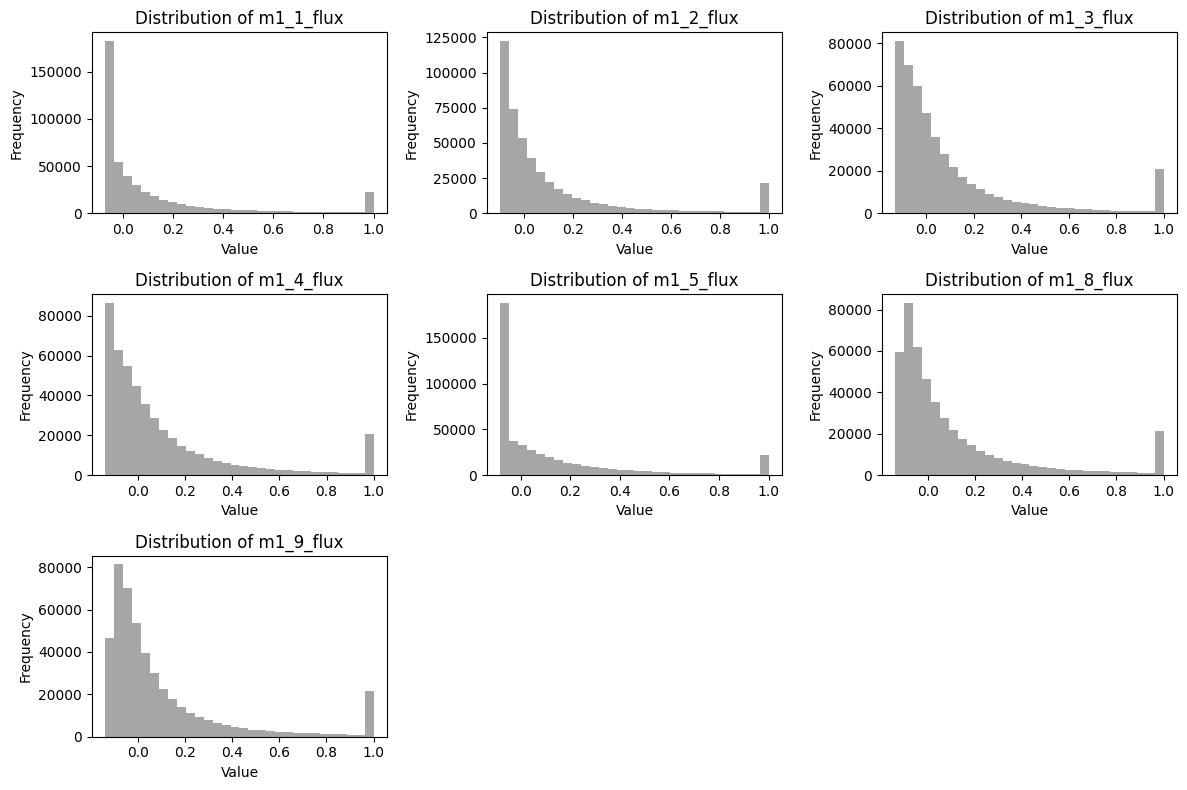

In [8]:
# plot the distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_flux_robust_scaled.columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(df_flux_robust_scaled[col], bins=30, color='gray', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [9]:
df_features = df[[
'm1_1_flux', 'm1_2_flux', 'm1_3_flux', 'm1_4_flux', 'm1_5_flux',
'm1_8_flux', 'm1_9_flux'
]]
df_features.head()

,m1_1_flux,m1_2_flux,m1_3_flux,m1_4_flux,m1_5_flux,m1_8_flux,m1_9_flux
detid,,,,,,,
106935404010036,4.379621e-15,3.810903e-15,1.044120e-14,7.383129e-15,9.202714e-14,1.180420e-13,2.481670e-14
100161401010013,0.000000e+00,3.210363e-15,1.025320e-14,1.152150e-14,7.585813e-14,1.008432e-13,2.546296e-14
105504607010008,1.499195e-14,2.694545e-14,2.421777e-14,3.382987e-14,1.477362e-13,2.477213e-13,8.968079e-14
106049401010003,5.117464e-15,1.737885e-14,4.448721e-14,8.498439e-14,2.119010e-13,3.638689e-13,1.337889e-13
108317906010155,1.149026e-16,1.392199e-15,6.839098e-16,1.123628e-15,1.947837e-14,2.279300e-14,3.603004e-15


In [10]:
# scaling of the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(scaled_data, columns=df_features.columns, index=df_features.index)
# PCA
pca = PCA(n_components=0.99)  # retain 99% of variance
pca.fit(df_features_scaled)
pca.explained_variance_ratio_

array([0.6147227 , 0.22111566, 0.08191202, 0.04493142, 0.02595803,
       0.01136018])

In [11]:
df_pca = pca.transform(df_features_scaled)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
df_pca.head()   

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.100850,0.148595,0.132441,-0.087745,-0.022894,-0.156081
1,0.034501,0.183734,-0.014698,-0.108593,-0.025115,-0.083054
2,0.931267,0.145786,0.219125,0.015523,0.003553,-0.070120
3,1.549564,0.764336,-0.311558,0.154569,-0.006246,0.070084
4,-0.316184,-0.010696,0.021097,-0.073679,-0.003550,-0.011707


In [12]:
# interpretation of the PCA components
pca.components_
pca_components = pd.DataFrame(pca.components_, columns=df_features.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_components

,m1_1_flux,m1_2_flux,m1_3_flux,m1_4_flux,m1_5_flux,m1_8_flux,m1_9_flux
PC1,0.311188,0.354003,0.420744,0.383550,0.300444,0.439285,0.412880
PC2,-0.401019,-0.463862,-0.133475,0.374422,0.566920,0.295750,-0.239043
PC3,0.642287,0.092878,-0.493769,-0.274658,0.369302,0.200874,-0.287858
PC4,0.550606,-0.503119,0.167614,0.495754,-0.312764,-0.165627,-0.211150
PC5,0.083107,-0.371550,-0.449950,0.009401,0.038918,-0.114046,0.798736
PC6,-0.124914,0.476617,-0.563541,0.608197,-0.247496,-0.039173,-0.083444


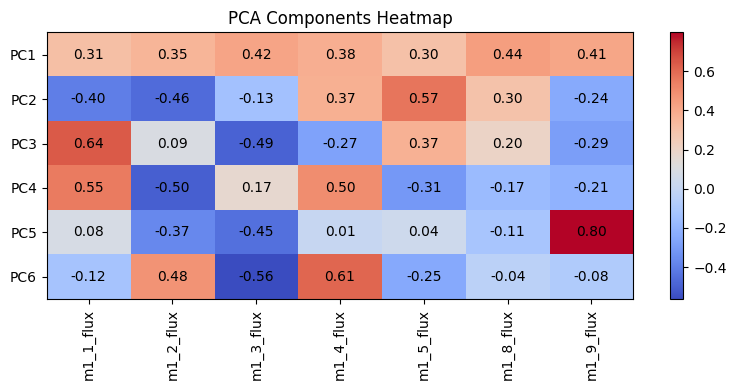

In [13]:
# visualization using a heatmap
plt.figure(figsize=(8, 4))
plt.imshow(pca_components, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(pca_components.columns)), labels=pca_components.columns, rotation=90)
plt.yticks(ticks=np.arange(len(pca_components.index)), labels=pca_components.index)
plt.title('PCA Components Heatmap')
# adding text inside the heatmap
for i in range(pca_components.shape[0]):
    for j in range(pca_components.shape[1]):
        plt.text(j, i, f'{pca_components.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

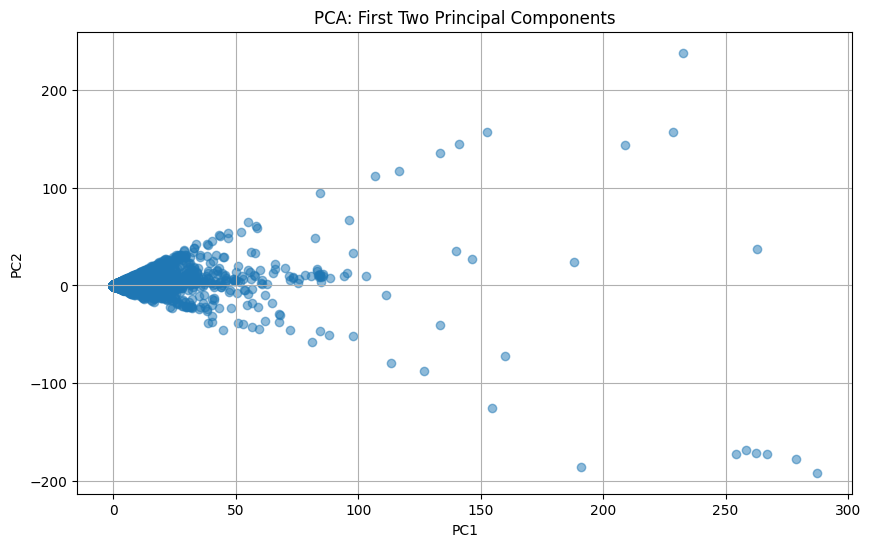

In [14]:
# scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [15]:
# create a dataframe with for each row the reconstruction errors for each PCA component
# subtract the original data from the PCA inverse transformed data
df_reconstruction = pd.DataFrame(pca.inverse_transform(df_pca.values), columns=df_features.columns, index=df_features.index)
df_reconstruction_errors = df_features_scaled - df_reconstruction

In [16]:
df_reconstruction_errors_scaled = StandardScaler().fit_transform(df_reconstruction_errors)
df_reconstruction_errors_scaled = pd.DataFrame(df_reconstruction_errors_scaled, columns=df_features.columns, index=df_features.index)
df_reconstruction_errors_scaled.head()

,m1_1_flux,m1_2_flux,m1_3_flux,m1_4_flux,m1_5_flux,m1_8_flux,m1_9_flux
detid,,,,,,,
106935404010036,-0.637467,-0.637467,-0.637467,-0.637467,-0.637467,0.637467,-0.360352
100161401010013,0.087243,0.087243,0.087243,0.087243,0.087243,-0.087243,0.070158
105504607010008,-1.021122,-1.021122,-1.021122,-1.021122,-1.021122,1.021122,-0.444582
106049401010003,0.499883,0.499883,0.499883,0.499883,0.499883,-0.499883,0.603615
108317906010155,0.087967,0.087967,0.087967,0.087967,0.087967,-0.087967,-0.182533


In [17]:
# apply PCA to the reconstruction errors
pca_reconstruction_errors = PCA(n_components=0.99)
pca_reconstruction_errors.fit(df_reconstruction_errors_scaled.values)
pca_reconstruction_errors.explained_variance_ratio_

array([0.90938661, 0.09061339])

In [18]:
# interpret the PCA components of the reconstruction errors
pca_reconstruction_errors.components_
# create a DataFrame for the PCA components of the reconstruction errors
pca_reconstruction_errors_components = pd.DataFrame(pca_reconstruction_errors.components_,
                                                   columns=df_reconstruction_errors_scaled.columns,
                                                   index=[f'PC{i+1}' for i in range(pca_reconstruction_errors.n_components_)])
pca_reconstruction_errors_components

,m1_1_flux,m1_2_flux,m1_3_flux,m1_4_flux,m1_5_flux,m1_8_flux,m1_9_flux
PC1,0.395009,0.395009,0.395009,0.395009,0.395009,-0.395009,0.252601
PC2,-0.103124,-0.103124,-0.103124,-0.103124,-0.103124,0.103124,0.967570


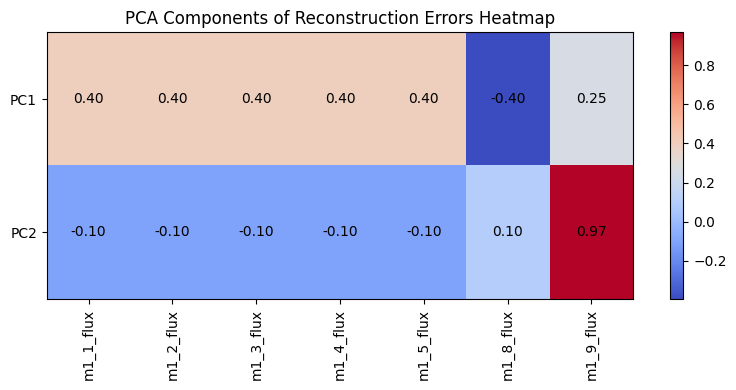

In [19]:
# visualize it using a heatmap
plt.figure(figsize=(8, 4))
plt.imshow(pca_reconstruction_errors_components, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(pca_reconstruction_errors_components.columns)), labels=pca_reconstruction_errors_components.columns, rotation=90)
plt.yticks(ticks=np.arange(len(pca_reconstruction_errors_components.index)), labels=pca_reconstruction_errors_components.index)
plt.title('PCA Components of Reconstruction Errors Heatmap')
plt.tight_layout()
# adding text inside the heatmap
for i in range(pca_reconstruction_errors_components.shape[0]):
    for j in range(pca_reconstruction_errors_components.shape[1]):
        plt.text(j, i, f'{pca_reconstruction_errors_components.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.show()

In [20]:
df_pca_reconstruction_errors = pca_reconstruction_errors.transform(df_reconstruction_errors_scaled.values)
df_pca_reconstruction_errors = pd.DataFrame(df_pca_reconstruction_errors,
                                            columns=[f'PC{i+1}' for i in range(df_pca_reconstruction_errors.shape[1])],
                                            index=df_reconstruction_errors_scaled.index)
df_pca_reconstruction_errors

,PC1,PC2
detid,,
106935404010036,-1.601855,0.045763
100161401010013,0.224493,0.013901
105504607010008,-2.532417,0.201649
106049401010003,1.337224,0.274741
108317906010155,0.162378,-0.231042
...,...,...
105010401010107,0.006811,0.003023
106553401470013,0.122071,0.214747
106732701010017,-0.278613,-0.115914


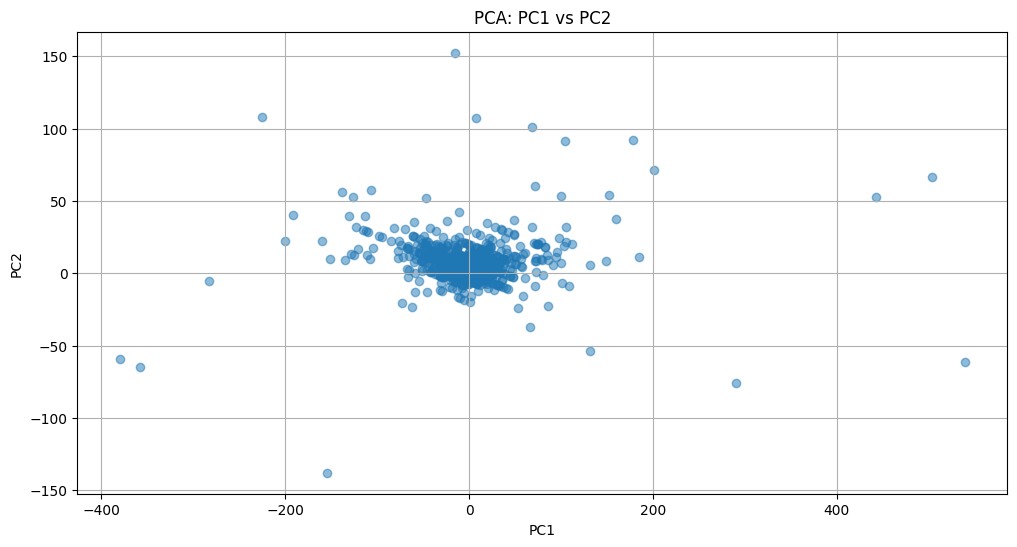

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,)
plt.title('PCA: PC1 vs PC2') # almost 99% of the variance!
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

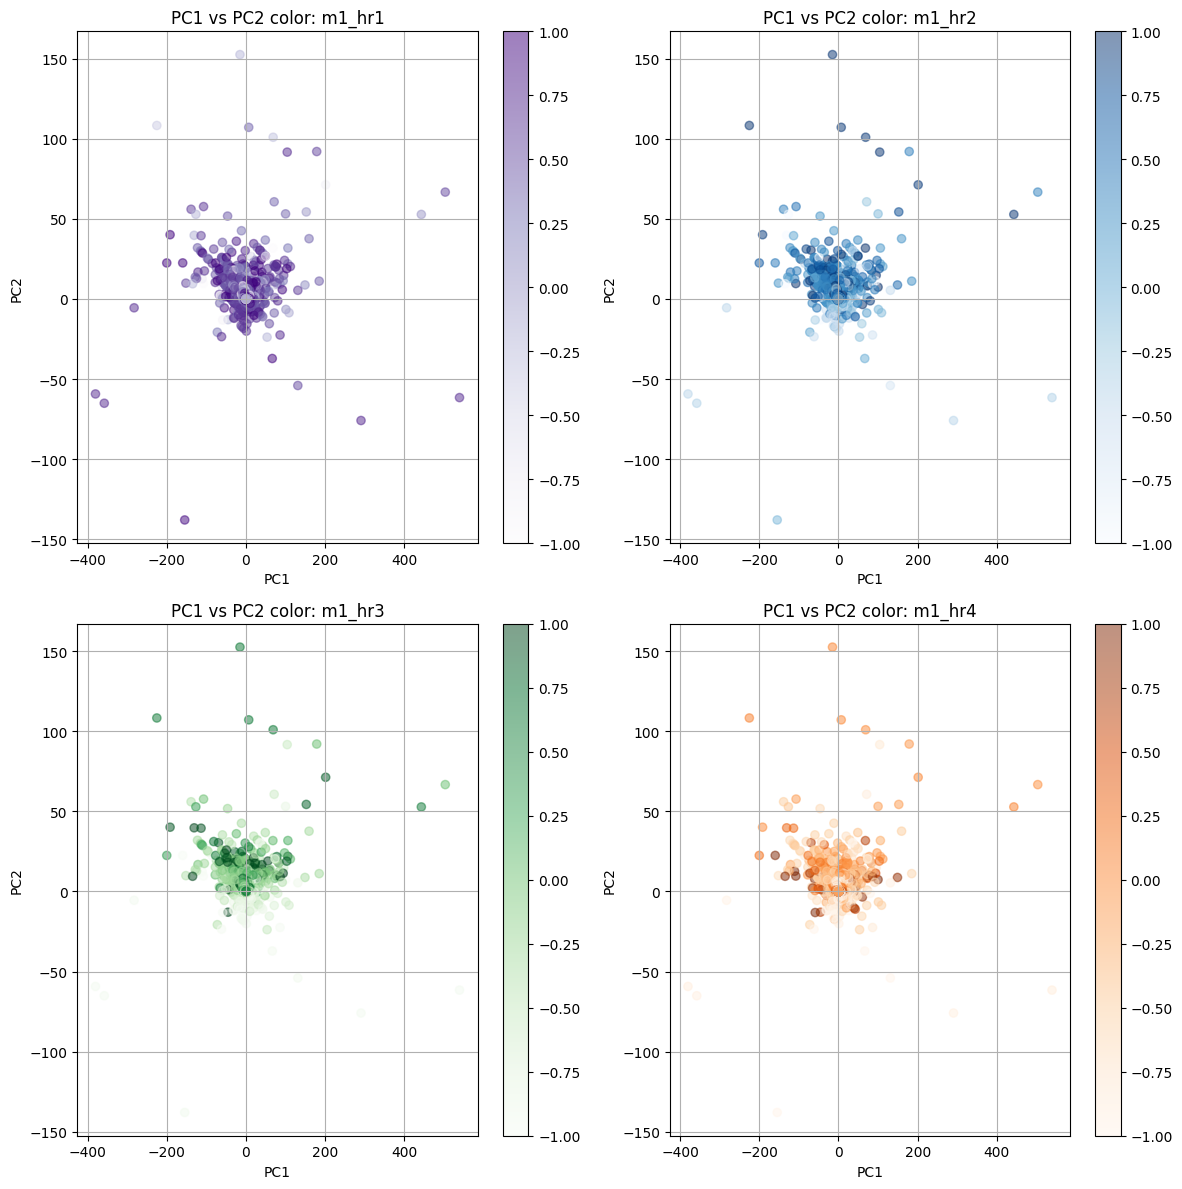

In [22]:
# creating 4 plots with hardness ratio colouring (for PCA1 vs PCA2)
#'m1_hr1' colouring
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df['m1_hr1'], cmap='Purples')
plt.title('PC1 vs PC2 color: m1_hr1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm1_hr2' colouring
plt.subplot(2, 2, 2)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df['m1_hr2'], cmap='Blues')
plt.title('PC1 vs PC2 color: m1_hr2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm1_hr3' colouring
plt.subplot(2, 2, 3)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df['m1_hr3'], cmap='Greens')
plt.title('PC1 vs PC2 color: m1_hr3')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm1_hr4' colouring
plt.subplot(2, 2, 4)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df['m1_hr4'], cmap='Oranges')
plt.title('PC1 vs PC2 color: m1_hr4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
plt.tight_layout()
# shows the color scale
plt.show()

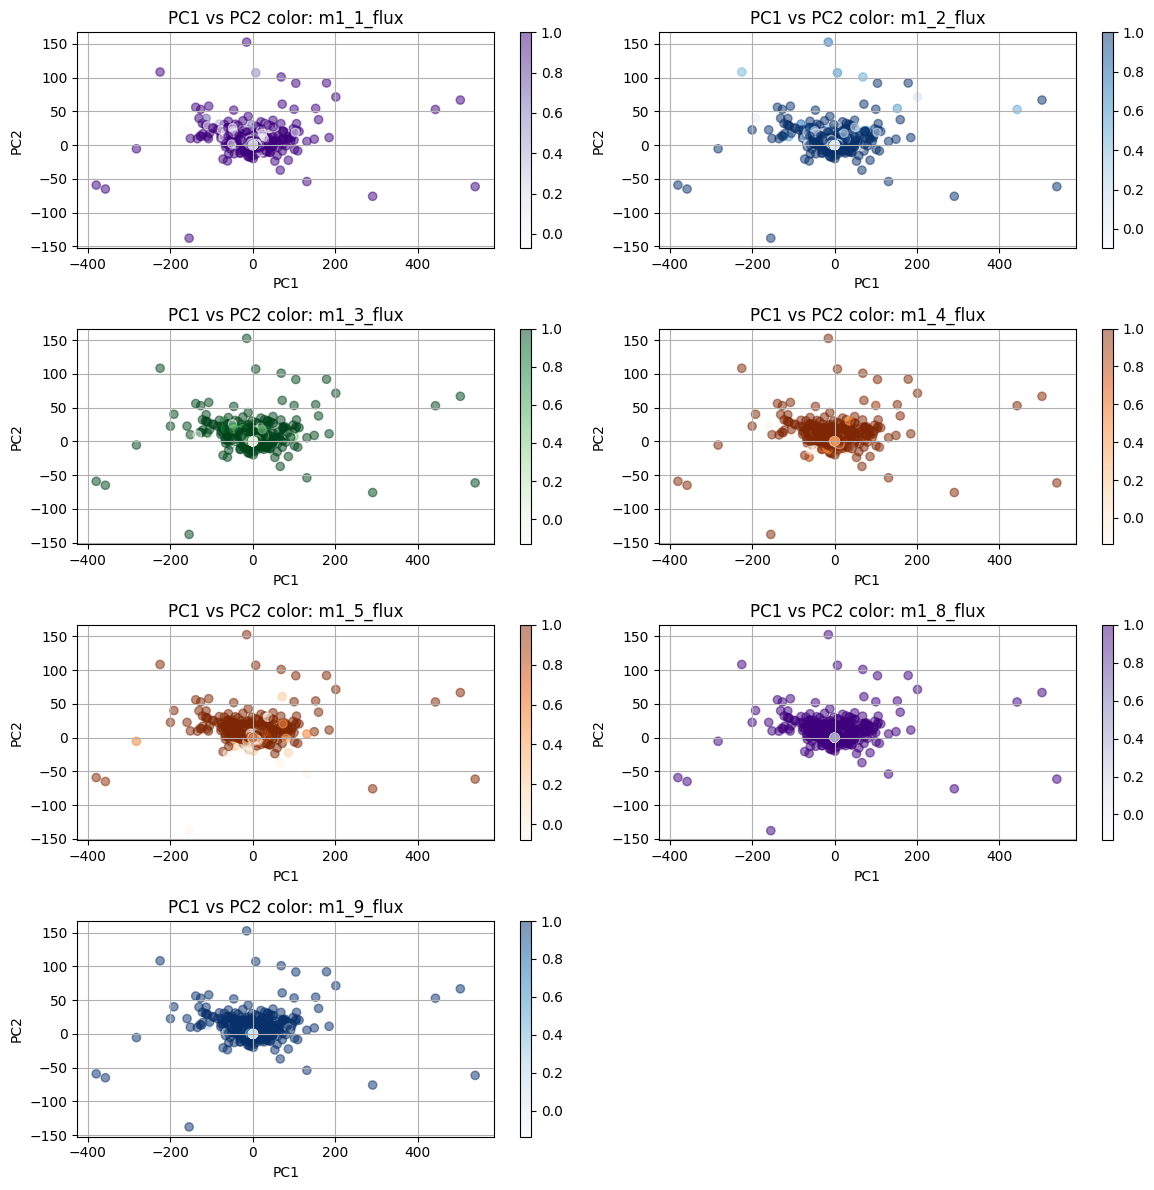

In [23]:
# creating 7 plots with fluxes as colouring (for PCA1 vs PCA2)
#'m1_flux' colouring
plt.figure(figsize=(12, 12))
plt.subplot(4, 2, 1)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m1_1_flux'], cmap='Purples')
plt.title('PC1 vs PC2 color: m1_1_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm1_2_flux' colouring
plt.subplot(4, 2, 2)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m1_2_flux'], cmap='Blues')
plt.title('PC1 vs PC2 color: m1_2_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm1_3_flux' colouring
plt.subplot(4, 2, 3)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m1_3_flux'], cmap='Greens')
plt.title('PC1 vs PC2 color: m1_3_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm1_4_flux' colouring
plt.subplot(4, 2, 4)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m1_4_flux'], cmap='Oranges')
plt.title('PC1 vs PC2 color: m1_4_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm1_5_flux' colouring
plt.subplot(4, 2, 5)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m1_5_flux'], cmap='Oranges')
plt.title('PC1 vs PC2 color: m1_5_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm1_8_flux' colouring
plt.subplot(4, 2, 6)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m1_8_flux'], cmap='Purples')
plt.title('PC1 vs PC2 color: m1_8_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm1_9_flux' colouring
plt.subplot(4, 2, 7)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m1_9_flux'], cmap='Blues')
plt.title('PC1 vs PC2 color: m1_9_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
plt.tight_layout()
# shows the color scale
plt.show()